# [CDAF] Atividade 3

## Nome
Nome: Rodrigo Felipe Lima Braz



## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [1]:
# %pip install matplotsoccer
# %pip install socceraction
#%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import socceraction.spadl as spadl
import matplotsoccer
import scipy

In [60]:
df_event = pd.read_json(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv3\events_England.json")
filt = df_event['matchId']  == 2499719
df_event = df_event[filt]
df_event.head(5)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [4]:
correct_columns = {'eventId':'type_id', 'subEventName':'subtype_name', 'playerId':'player_id',
              'matchId':'game_id', 'eventName':'type_name', 'teamId':'team_id',
              'eventSec':'milliseconds', 'subEventId':'subtype_id', 'id':'event_id'
              }
df_event.rename(columns=correct_columns, inplace=True)
df_event['period_id'] = pd.factorize(df_event['matchPeriod'])[0]+1

df_event.head(5)

,type_id,subtype_name,tags,player_id,positions,game_id,type_name,team_id,matchPeriod,milliseconds,subtype_id,event_id,period_id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171,1
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172,1
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173,1
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174,1
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175,1


In [5]:
events_spadl = spadl.wyscout.convert_to_actions(df_event, '1609')
events_spadl.head(5)

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
0,2499719,1,0.002759,1609,25413,53.55,33.32,72.45,53.04,177959171,0,0,1,0
1,2499719,1,0.004947,1609,370224,72.45,53.04,51.45,51.00,177959172,0,0,1,1
2,2499719,1,0.006542,1609,3319,51.45,51.00,68.25,48.28,177959173,1,0,1,2
3,2499719,1,0.008143,1609,120339,68.25,48.28,61.95,64.60,177959174,1,0,1,3
4,2499719,1,0.010302,1609,167145,61.95,64.60,29.40,59.84,177959175,0,0,1,4


In [6]:
typename = spadl.actiontypes_df()
bodyparts = spadl.bodyparts_df()
results = spadl.results_df()
merged = pd.merge(events_spadl, typename, on='type_id')
merged1 = pd.merge(merged, bodyparts, on='bodypart_id')
final_match_events = pd.merge(merged1, results, on='result_id')
final_match_events = final_match_events.drop(['type_id', 'bodypart_id', 'result_id'], axis=1)
final_match_events = final_match_events.rename(columns={'type_name': 'type', 'bodypart_name':'bodypart', 'result_name':'result'})
final_match_events.head(6)

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499719,1,0.002759,1609,25413,53.55,33.32,72.45,53.04,177959171,0,pass,foot,success
1,2499719,1,0.004947,1609,370224,72.45,53.04,51.45,51.00,177959172,1,pass,foot,success
2,2499719,1,0.010302,1609,167145,61.95,64.60,29.40,59.84,177959175,4,pass,foot,success
3,2499719,1,0.020427,1609,14869,57.75,30.60,30.45,36.72,177959180,10,pass,foot,success
4,2499719,1,0.029981,1631,265366,74.55,17.68,66.15,5.44,177959196,15,pass,foot,success
5,2499719,1,0.031164,1631,8013,66.15,5.44,80.85,3.40,177959197,16,pass,foot,success


## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

In [7]:
filt = final_match_events['action_id'] < 5
final_match_events_plot = final_match_events[filt]
final_match_events_plot

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499719,1,0.002759,1609,25413,53.55,33.32,72.45,53.04,177959171,0,pass,foot,success
1,2499719,1,0.004947,1609,370224,72.45,53.04,51.45,51.00,177959172,1,pass,foot,success
2,2499719,1,0.010302,1609,167145,61.95,64.60,29.40,59.84,177959175,4,pass,foot,success
917,2499719,1,0.006542,1609,3319,51.45,51.00,68.25,48.28,177959173,2,pass,head,success
918,2499719,1,0.008143,1609,120339,68.25,48.28,61.95,64.60,177959174,3,pass,head,success


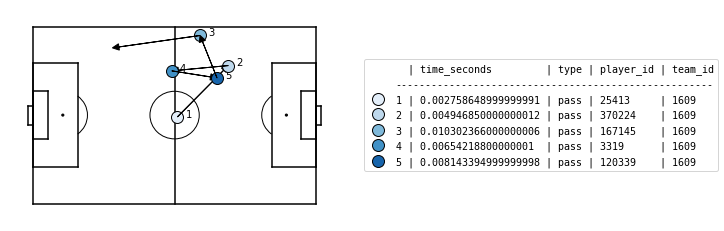

In [8]:
matplotsoccer.actions(
    location=final_match_events_plot[["start_x", "start_y", "end_x", "end_y"]],
    action_type=final_match_events_plot['type'],
    team=final_match_events_plot['team_id'],
    result= final_match_events_plot['result'] == "success",
    label=final_match_events_plot[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time_seconds","type","player_id","team_id"],
    zoom=False
)

## Questão 3
- Visualize os chutes da partida, desenvolvendo seu código em cima do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time as melhores chances da partida? Por quê?

In [9]:
filt1 = final_match_events['type'] == 'shot'
df_chutes = final_match_events[filt1]

filt2= df_chutes['team_id'] == 1609
filt3 = df_chutes['team_id'] == 1631

df_chutes_home = df_chutes[filt2]
df_chutes_away = df_chutes[filt3]

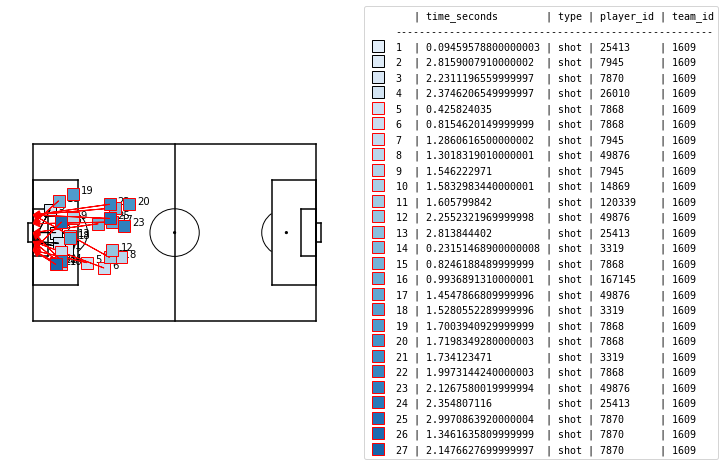

In [10]:
#Plot de chutes para home Team
matplotsoccer.actions(
    location=df_chutes_home[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_chutes_home['type'],
    team=df_chutes_home['team_id'],
    result= df_chutes_home['result'] == "success",
    label=df_chutes_home[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time_seconds","type","player_id","team_id"],
    zoom=False
)

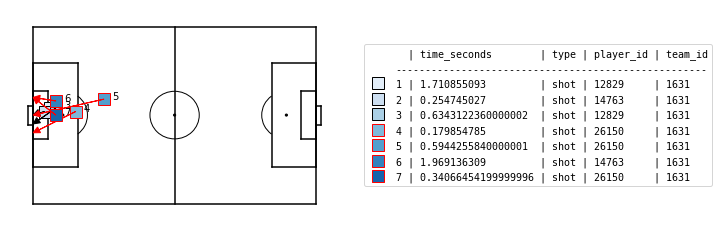

In [11]:
#Plot de chutes para away Team
matplotsoccer.actions(
    location=df_chutes_away[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_chutes_away['type'],
    team=df_chutes_away['team_id'],
    result= df_chutes_away['result'] == "success",
    label=df_chutes_away[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time_seconds","type","player_id","team_id"],
    zoom=False
)

Apesar do home team, ter chutado bem mais ao gol, ele teve apenas 1 chute feito com sucesso a mais que o away team, que chutou 20 vezes a menos, o que podemos concluir que ambos tiveram quantidades de chances bem diferentes, entretanto um aproveitamento muito parecido. O home team desperdiça bem mais chutes que o away Team, entretanto cria consideravelmente mais chances também.

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? O comportamento dele varia muito do ataque para a defesa?

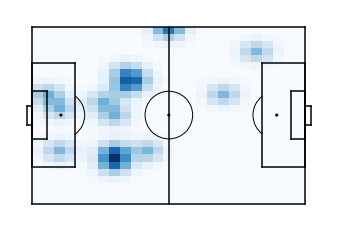

<AxesSubplot:>

In [38]:
filt_player = final_match_events['player_id'] == 7870
df_player = final_match_events[filt_player]
df_player.head(5)

#Todas ações
x = df_player['start_x']
y = df_player['start_y']

hm = matplotsoccer.count(x,y,n=25,m=25)
hm = scipy.ndimage.gaussian_filter(hm,1)

matplotsoccer.heatmap(hm)

In [47]:
df_player['type'].unique()

array(['pass', 'interception', 'shot', 'throw_in'], dtype=object)

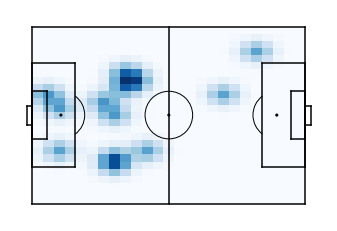

<AxesSubplot:>

In [44]:
filt2= ((df_player['type'] == 'pass') | (df_player['type'] == 'shot'))
df_ofensivo = df_player[filt2]
df_ofensivo
#Ações ofensivas (como escolhi chute e passe como ofensivo, vão ter alguns passes na defesa...)
x = df_ofensivo['start_x']
y = df_ofensivo['start_y']

hm = matplotsoccer.count(x,y,n=25,m=25)
hm = scipy.ndimage.gaussian_filter(hm,1)

matplotsoccer.heatmap(hm)

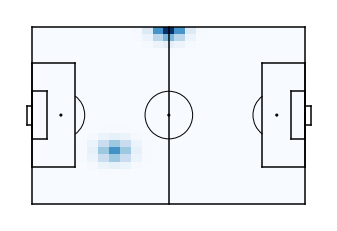

<AxesSubplot:>

In [48]:
filt2= ((df_player['type'] == 'throw_in') | (df_player['type'] == 'interception'))
df_defensivo= df_player[filt2]
df_defensivo
#Ações defensivas
x = df_defensivo['start_x']
y = df_defensivo['start_y']

hm = matplotsoccer.count(x,y,n=25,m=25)
hm = scipy.ndimage.gaussian_filter(hm,1)

matplotsoccer.heatmap(hm)

Comportamento varia bastante de ataque pra defesa, tem bem mais pontos de calor em ações ofensivas do que defensivas, o que me leva a imaginar que esse jogador provavelmente é um jogador de ataque.

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

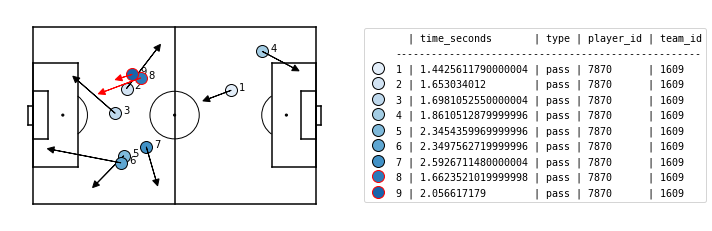

In [57]:
filt3= df_player['type'] == 'pass'
df_pass= df_player[filt3]

matplotsoccer.actions(
    location=df_pass[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_pass['type'],
    team=df_pass['team_id'],
    result= df_pass['result'] == "success",
    label=df_pass[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time_seconds","type","player_id","team_id"],
    zoom=False
)


O mapa de passes só confirmou o que eu suspeitava, que este jogador muito provavelmente é um atacante, pois as regiões que ele mais tenta passes, são regioes que geralmente atacantes trocam passes.

## Questão 6
- Crie uma rede de passes de cada uma das equipes, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

In [73]:
#Com 'de cada uma das equipes, estou assumindo as duas equipes da partida.'
filtht = final_match_events['team_id'] == 1609
filtat = final_match_events['team_id'] == 1631


final_match_events_ht = final_match_events[filtht]
final_match_events_at = final_match_events[filtat]

filt_pass = final_match_events_ht['type'] == 'pass'
filt_pass2 = final_match_events_at['type'] == 'pass'

final_match_events_ht = final_match_events_ht[filt_pass]
final_match_events_at= final_match_events_at[filt_pass2]

filt_success = final_match_events_ht['result'] == 'success'
filt_success2 = final_match_events_at['result'] == 'success'

final_match_events_ht = final_match_events_ht[filt_success]
final_match_events_at= final_match_events_at[filt_success2]

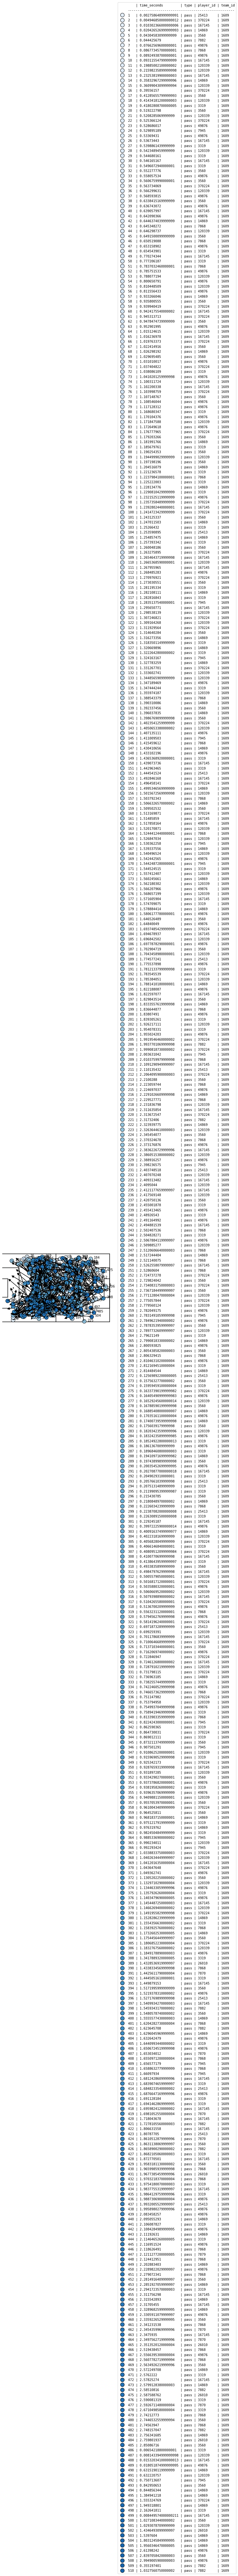

In [76]:
#Rede de passes equipe 1

matplotsoccer.actions(
    location=final_match_events_ht[["start_x", "start_y", "end_x", "end_y"]],
    action_type=final_match_events_ht['type'],
    team=final_match_events_ht['team_id'],
    result= final_match_events_ht['result'] == "success",
    label=final_match_events_ht[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time_seconds","type","player_id","team_id"],
    zoom=True
)

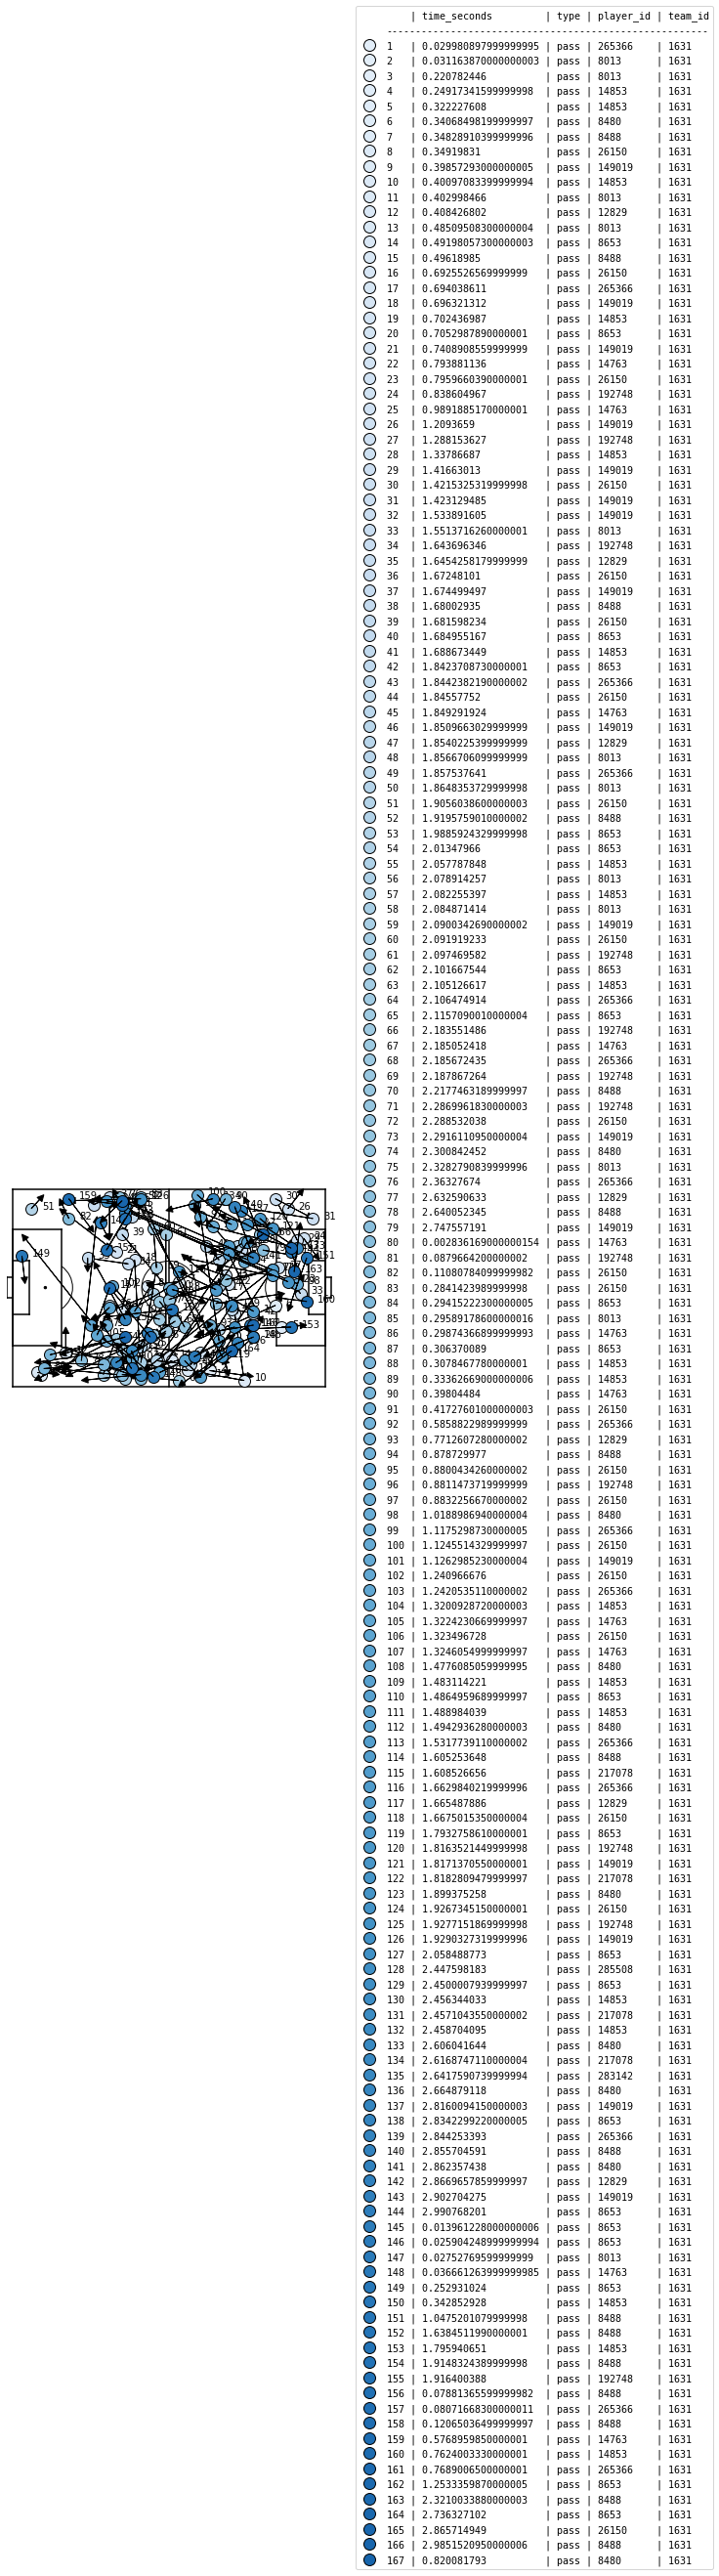

In [77]:
#Rede de passes equipe 2

matplotsoccer.actions(
    location=final_match_events_at[["start_x", "start_y", "end_x", "end_y"]],
    action_type=final_match_events_at['type'],
    team=final_match_events_at['team_id'],
    result= final_match_events_at['result'] == "success",
    label=final_match_events_at[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time_seconds","type","player_id","team_id"],
    zoom=True
)

Podemos inferir que a equipe 1 teve uma posse de bola muito maior, visto que, deu quase 4x mais passes que a equipe 2. Podemos inferir também que, a equipe 2 joga bem aberto pelas pontas, e a equipe 1 bem distribuida. 